In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, auc, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

from utils import *

In [2]:
data = pd.read_csv('train.csv', index_col='id')
X_train, X_validation, y_train, y_validation = train_test_split(
    data.drop('target', axis=1), data.target, test_size=0.33
)

In [3]:
multinomial_feature_pipeline = ColumnTransformer(
    [
        ('hastag_t', FunctionTransformer(lambda x: hashtags(x)), 'text'),
        ('mention_t', FunctionTransformer(lambda x: mentions(x)), 'text'),
        ('mean_word_len', FunctionTransformer(lambda x: mean_word_length(x)), 'text'),
        ('tweet_length_t', FunctionTransformer(lambda x: tweet_length(x)), 'text')
    ]
)

In [4]:
meta_data = pd.DataFrame(multinomial_feature_pipeline.fit_transform(X_train))
meta_data = pd.DataFrame(np.hstack([meta_data, y_train.values.reshape(-1,1)]))
meta_data_features = ['hastag', 'mention', 'mean_word_len', 'tweet_len']
meta_data.columns = meta_data_features + ['target']

/Users/deangarlick/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/deangarlick/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


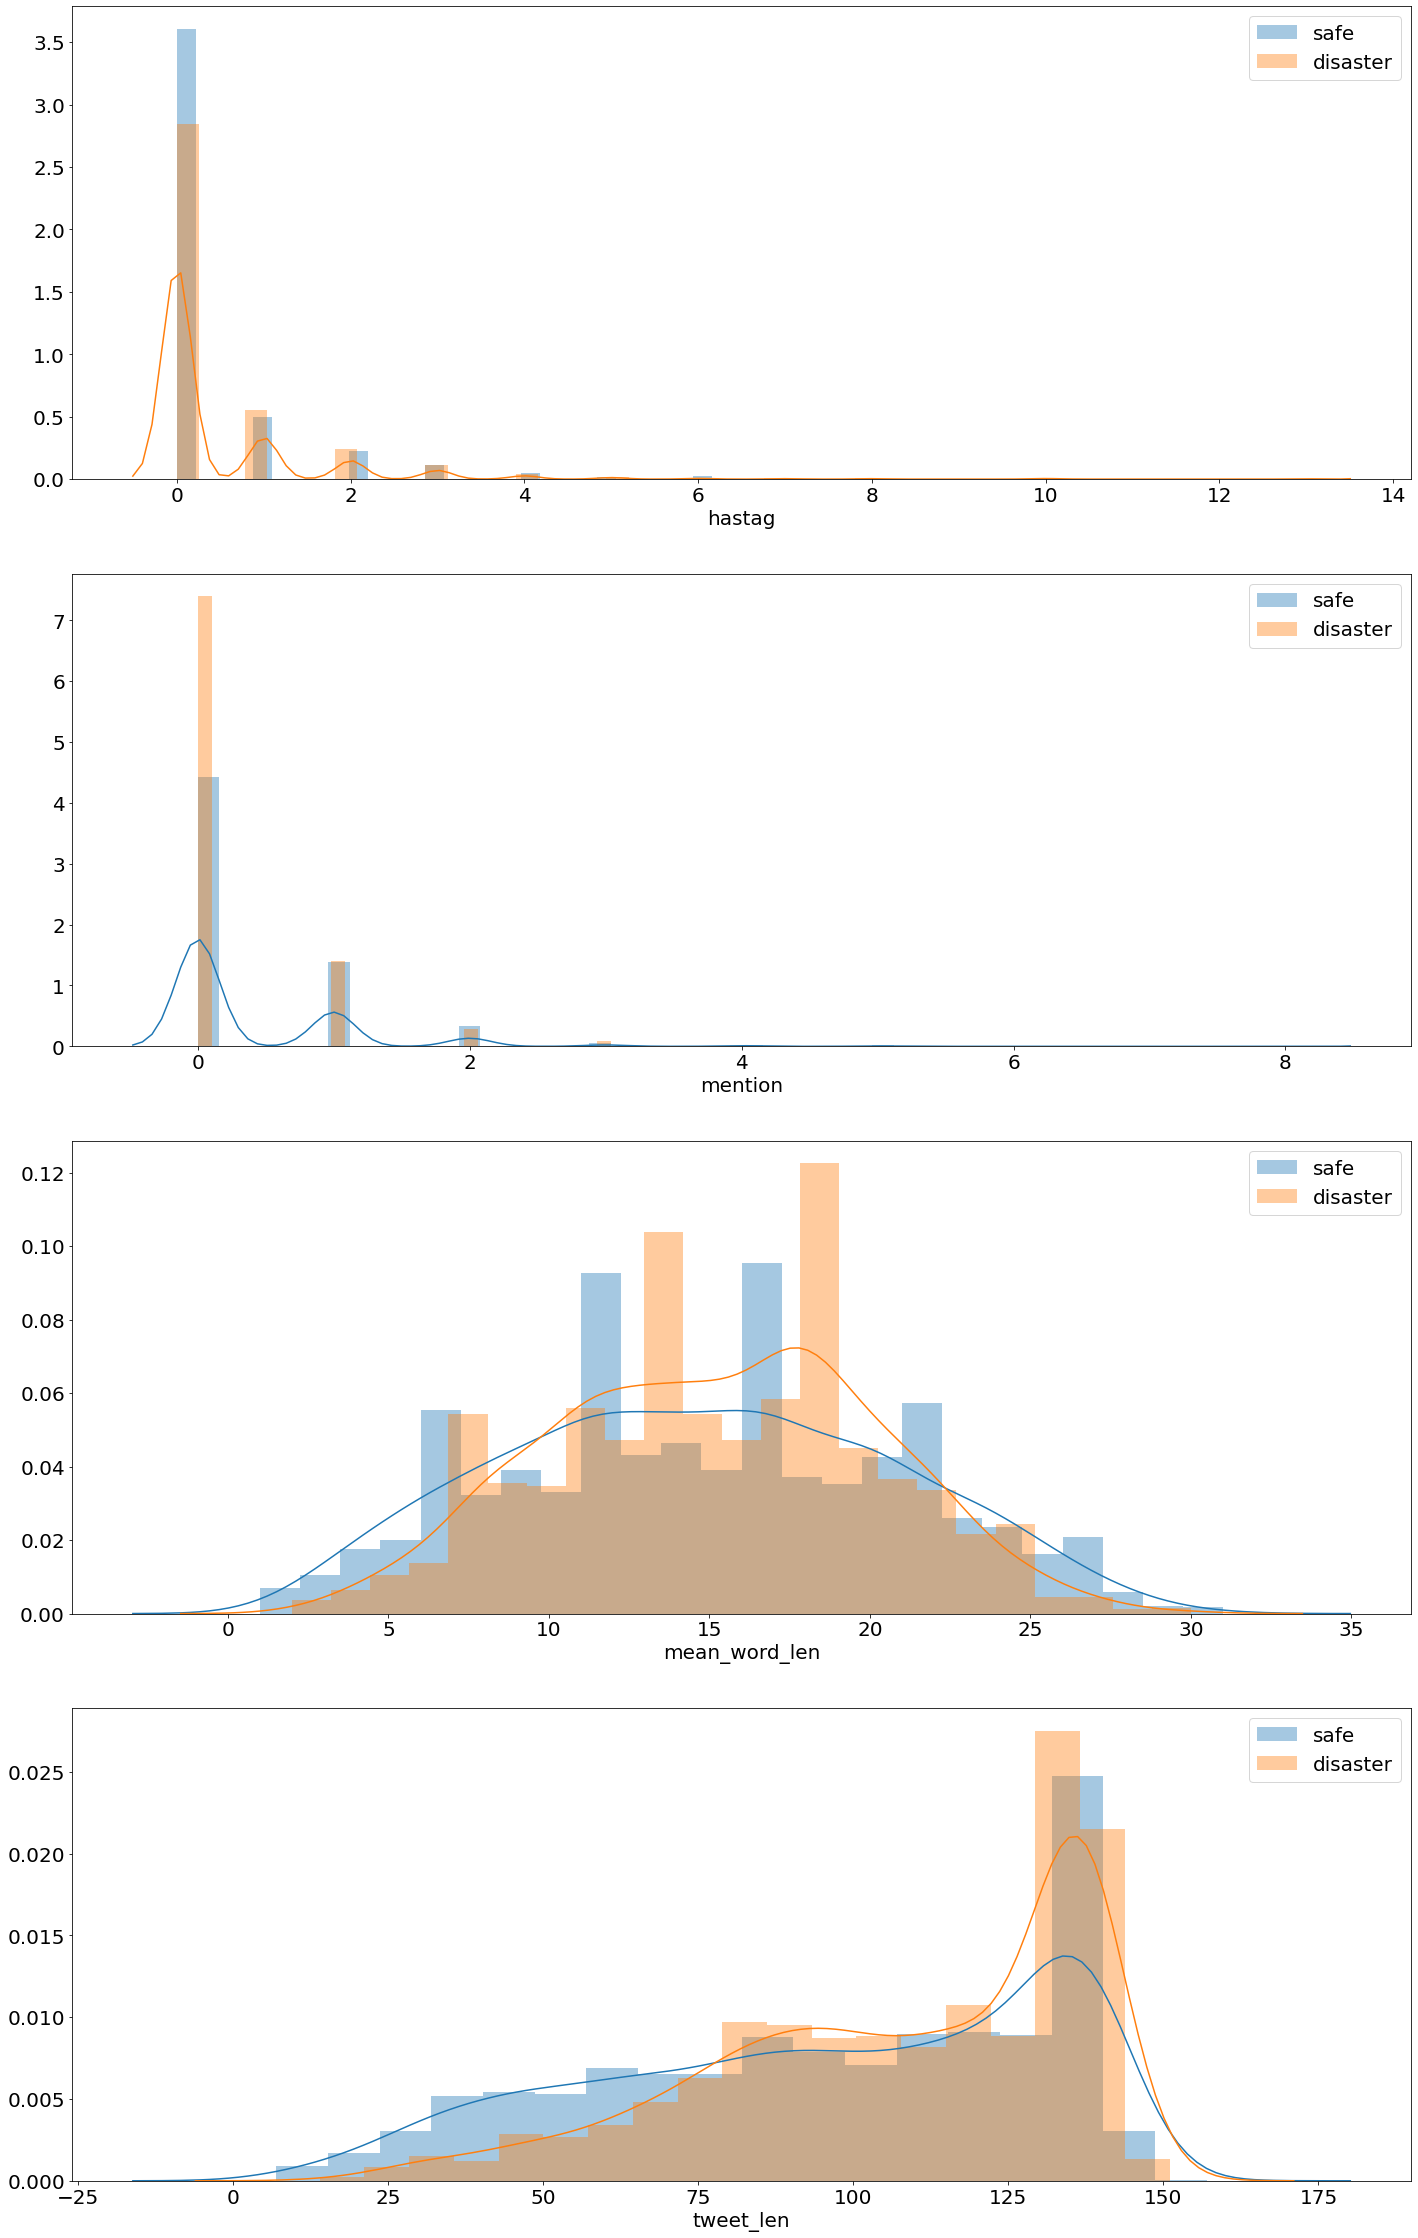

In [5]:
ncols=1
nrows=len(meta_data_features)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24,10*nrows))

for n, feature in enumerate(meta_data_features, 1):
    plt.subplot(nrows, ncols, n)
    sns.distplot(meta_data.loc[meta_data['target']==0][feature], label='safe')
    sns.distplot(meta_data.loc[meta_data['target']==1][feature], label='disaster')
    plt.tick_params(axis='y', labelsize=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.xlabel(feature, fontsize=20)
    plt.legend(loc='upper right', fontsize=20)
plt.show()

In [6]:
multinomial_pipeline = Pipeline(
    [
        ('multiNB_featurizer', multinomial_feature_pipeline),
        ('multiNB_model', MultinomialNB())
    ]
)

multinomial_pipeline.fit(X_train, y_train);

In [7]:
accuracy_score(multinomial_pipeline.predict(X_validation),y_validation)

0.6263430163151612

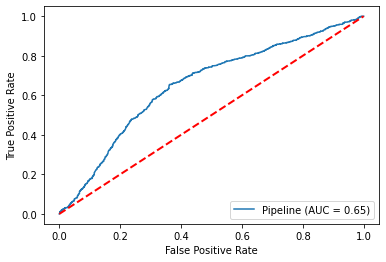

In [8]:
plot_roc_curve(multinomial_pipeline, X_validation, y_validation)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.show()

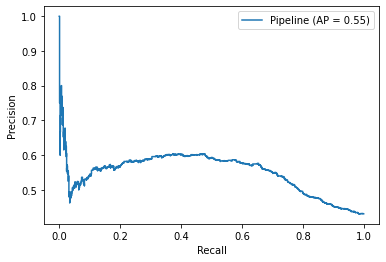

In [9]:
plot_precision_recall_curve(multinomial_pipeline, X_validation, y_validation)
plt.legend(loc='upper right')
plt.show()